# NEXT STEPS:
### 1) Ward will add OBP/SLGpct for each team
### 2) Individual queries
### 3) Specific Stories per team 
### 4) Ben regresssion 
### 5) More writing to connecting








# Salary, Gameplay, and Win Percentage: A Case Study of Three Teams
### Ward Anderson, Ben Brown, Jeff Stevens
### Dr. Kretchmar
### CS 181
### 10/22/18

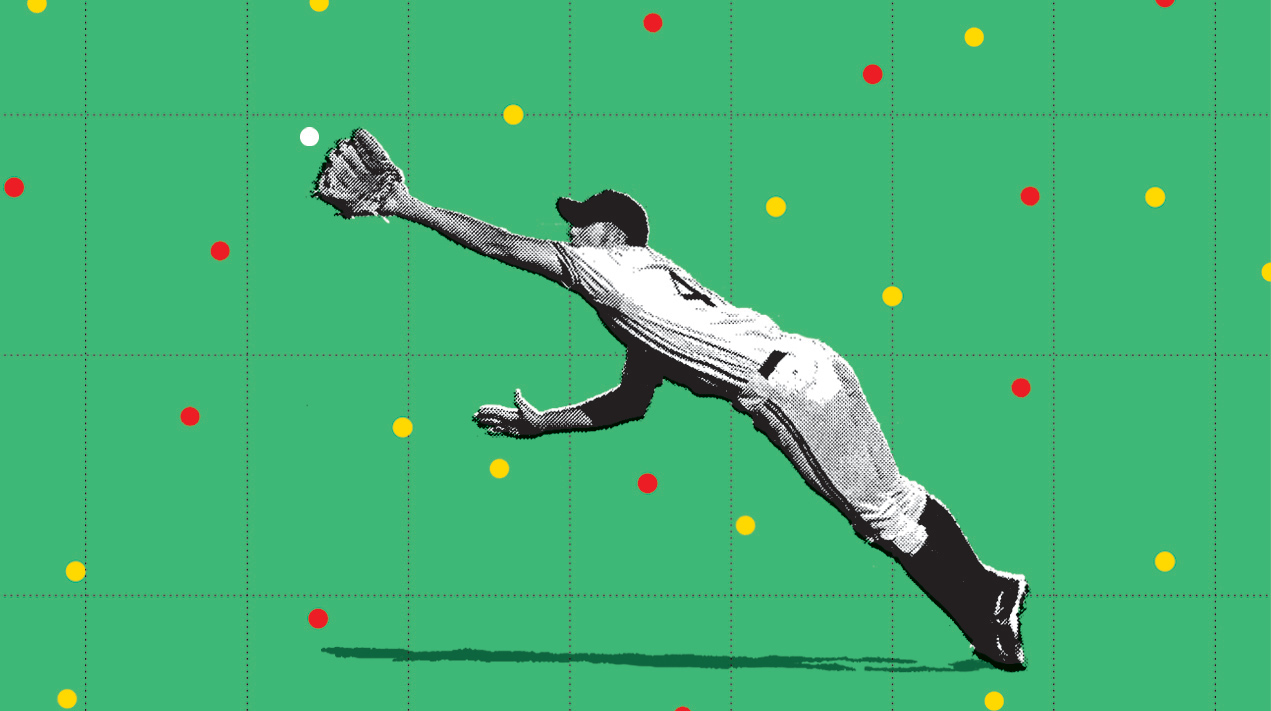

(Munday)

Baseball, endearingly called "America's favorite pastime", has been a popular sport since the 19th century. Throughout its lifespan, it has undergone a myriad of rule changes. From the unbanning of overhand pitching to the addition of designated hitters in the American league in 1972 ("Baseball Rule Change Timeline"), the meta has shifted the viable strategies and the important aspects of the game for teams improve upon. These specific game aspects have been extensively examined in the statistics of baseball, and they have fortunately been catalogued since the early 1900's. The Sean Lahman baseball database holds observations for all notable statistics in baseball, which we will examine in the following content.

For those unfamiliar with baseball statistics, a vast amount of game actions are recorded as stats, but some of the more popular stats to display happen to be batting average, earned run average, and fielding percentage, all abbreviated as BA, ERA, and FP respectively. These stats also tend to be associated and deterministic of team success as well.

Batting average is intended to describe the liklihood of a player to make a base hit and is calculated by the number hits a player makes divided by the number of times they step up to the plate to bat. While sabermetricians, analyzers of empirical baseball statistics, have agreed on the fact that it is a good idea to track a statistic for such a purpose, they also have agreed that batting average is, surprisingly, not very deterministic in regard to victories or team success. The reason for this common opinion will be explored later in this paper. Other calculations, such as the slugging percentage, have been created to fix the predictive errors that arose with relying on batting average (Albert).

Earned run average is the number of runs allowed by a pitcher in nine innings and is calculated by the dividing the number of runs scored by the other team by the numbers of innings pitched, multiplied by nine. ERA has been agreed upon to be a decent metric with which to grade the defense of a team. Note well that ERA is more so indicative of the defense of the entire fielding team than it is of just the ability of the pitcher. More calculations exist which isolate the skill of certain positions and indicate specific strengths. A pitcher independent statistic which measures defense well is the strikeout rate, while fielding percentage tends to be more exclusive from the pitcher (Albert).

Fielding percentage shows the percentage of how many fielding plays are done without error. This percentage is determined simply by the number of successful fielding plays (put-outs and assists) divided by the total plays (put-outs, assists, and errors). The ability of specific fielders can also be further isolated by calculating fielder range, but that will not be inspected in this analysis (Albert).

Our analysis of the database began by focusing on a subset of the data, that being each of our favorite teams: the Washington Nationals, the Cincinnati Reds, and the Cleveland Indians. Given that the focus was narrowed, we decided to pit the popular statistics described above of each of our teams against one another. This seemed especially interesting, as the database provided observations that date all the way back to the year 1901.

The code below opens up our tools for data analysis and connects us to the database.

In [1]:
#Import libraries for data handling
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import json
import numpy as np

#Include inflation data
inflation = pd.read_csv("conversionfactors.csv")

def getCreds(filename,subset,defaults={}):
    '''
    This function helps us connect to a database on hadoop2.  The
    userid password information is stored in a local file encoded
    in json format.  
    Inputs:
        filename is where json encoded userid/password information stored
        subset : dictionary key in json file
        defaults : alternative way to connect to database
    Returns subdictionary based on subset parameter.
    '''
    try:
        with open(filename,'r') as file:
            D = json.load(file)
            file.close()
            if D[subset]:
                return D[subset]
            else:
                return defaults
    except:
        return defaults
     
def db_setup(database):
    template = 'mysql+mysqlconnector://{}:{}@hadoop2.mathsci.denison.edu/{}'
    cstring = template.format(creds['user'],creds['password'],database)
    return cstring

creds = getCreds('creds.json','mysql',defaults = {'user':'steven_j1', 'password':'steven_j1'})

cstring = db_setup("lahman2016")
engine = sa.create_engine(cstring)
connection = engine.connect()

In [2]:
#Plot batting average, earned run average, and fielding average for all teams of all time here

While it can be fun to see whose team reigns supreme, we cannot draw too many meaningful conclusions from these graphs. One of these few conclusions could be to look more closely at each team to determine why these graphs present the information they do, and we will follow through with that conclusion, beginning with the Cleveland Indians.

## The Cleveland Indians

Below, we have a table of some of the Cleveland Indians' average offense and defense stats since 1901.

In [16]:
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## CLEVELAND INDIANS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#

query_main = '''SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, t.W/(t.W+t.L) AS Winpct, t.FP \
FROM Teams AS t \
WHERE franchID = "CLE";'''

getclesal = "SELECT yearID, AVG(salary) AS CleSalary \
FROM Salaries \
WHERE teamID = 'CLE' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Cleveland Indians query to DataFrame
result = connection.execute(query_main)
rows = result.fetchall()
CleStats = pd.DataFrame(rows,columns = result.keys())
CleStats = CleStats.rename(index = str, columns = {'teamID':'CleTeamID', 'franchID':\
                                                     'CleFranchID', 'H': 'CleH', 'AB':'CleAB', 'W':'CleW', 'L':\
                                                     'CleL', 'ERA': 'CleERA', 'BA':'CleBA', 'Winpct':'CleWinpct', \
                                                     'FP': 'CleFP'})
print("Statistics for The Cleveland Indians Baseball Team Since 1901")
print(CleStats)

Statistics for The Cleveland Indians Baseball Team Since 1901
     yearID CleTeamID CleFranchID  CleH  CleAB  CleW  CleL  CleERA   CleBA  \
0      1901       CLE         CLE  1311   4833    54    82    4.12  0.2713   
1      1902       CLE         CLE  1401   4840    69    67    3.28  0.2895   
2      1903       CLE         CLE  1265   4773    77    63    2.73  0.2650   
3      1904       CLE         CLE  1340   5152    86    65    2.22  0.2601   
4      1905       CLE         CLE  1318   5166    76    78    2.85  0.2551   
5      1906       CLE         CLE  1516   5426    89    64    2.09  0.2794   
6      1907       CLE         CLE  1221   5068    85    67    2.26  0.2409   
7      1908       CLE         CLE  1221   5108    90    64    2.02  0.2390   
8      1909       CLE         CLE  1216   5048    71    82    2.40  0.2409   
9      1910       CLE         CLE  1316   5385    71    81    2.88  0.2444   
10     1911       CLE         CLE  1501   5321    80    73    3.36  0.2821   
11

As stated above, it is necessary to use different metrics than batting average to gage a team's offense. "There's too many things wrong, starting from the fact that there are a lot of variables involved such as not including walks, or the subjective nature of awarding hits and errors," says C. Trent Rosecrans of CBS Sports. As far as any method of analysis in sabermetrics goes, there is no silver bullet. In regards to offense, Rosecrans recommends a stat titled OPS+, a fancy abbreviation for on-base plus slugging percentage, for an accurate measurement of offense. Slugging percentage is calculated similarly to batting average, but has different weighting for singles, doubles, triples, and home runs so that the productivity of the batter is measured. A perfect slugging percentage is 4.000. As for on base percentage, it is merely the number of times a player gets on base out of the amount of times they go up to bat, in any method possible, including walks and errors.

Below we will calculate the OPS+ for the Cleveland Indians.

In [ ]:
#calculate OPS+

As it was the case for offense stats, there are more than enough stats to choose to measure the defensive capabilities of a team. The baseball writers for CBS Sports did not reach a concensus on which stat might be the most productive for analysis (“What Is the Best Defensive Stat?"). Therefore, we will just simply inspect the earned run average and fielding percentage.

In [ ]:
#calculate FP and ERA

### individual study here

## The Washington Nationals
In very much the same way as we studied the Indians, we will take a look at the statistics of the Nationals.

In [4]:
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## WASHINGTON NATIONALS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
    
    
WAS_query = '''SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, t.W/(t.W+t.L) AS Winpct, t.FP
FROM Teams AS t
WHERE t.franchID = "WSN";'''
resultproxy = connection.execute(WAS_query)

getwsnsal = "SELECT yearID, AVG(salary) AS WsnSalary \
FROM Salaries \
WHERE teamID = 'WSN' \
OR teamID = 'WAS' \
OR teamID = 'MON' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Washington Nationals query to DataFrame
tmp = connection.execute(WAS_query)
WAS_stats = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
WAS_stats = WAS_stats.rename(index = str, columns = {'teamID':'WasTeamID', 'franchID':\
                                                     'WasFranchID', 'H': 'WasH', 'AB':'WasAB', 'W':'WasW', 'L':\
                                                     'WasL', 'ERA': 'WasERA', 'BA':'WasBA', 'Winpct':'WasWinpct', \
                                                     'FP': 'WasFP'})
print(WAS_stats)

    yearID WasTeamID WasFranchID  WasH  WasAB  WasW  WasL  WasERA   WasBA  \
0     1969       MON         WSN  1300   5419    52   110    4.33  0.2399   
1     1970       MON         WSN  1284   5411    73    89    4.50  0.2373   
2     1971       MON         WSN  1312   5335    71    90    4.12  0.2459   
3     1972       MON         WSN  1205   5156    70    86    3.59  0.2337   
4     1973       MON         WSN  1345   5369    79    83    3.71  0.2505   
5     1974       MON         WSN  1355   5343    79    82    3.60  0.2536   
6     1975       MON         WSN  1346   5518    75    87    3.72  0.2439   
7     1976       MON         WSN  1275   5428    55   107    3.99  0.2349   
8     1977       MON         WSN  1474   5675    75    87    4.01  0.2597   
9     1978       MON         WSN  1404   5530    76    86    3.42  0.2539   
10    1979       MON         WSN  1445   5465    95    65    3.14  0.2644   
11    1980       MON         WSN  1407   5465    90    72    3.48  0.2575   

## The Cincinnati Reds


In [5]:
   #-#-#-#-#-#-#-#-#-#-#-#-#-#-#
########## CINCINNATI REDS ##########
     #-#-#-#-#-#-#-#-#-#-#-#-#-#-#

getredstats = "SELECT t.yearID, t.teamID, t.franchID, t.H, t.AB, t.W, t.L, t.ERA, t.H/t.AB AS BA, \
t.W/(t.W+t.L) AS Winpct, t.FP, (t.H - t.2B - t.3B - t.HR + (t.2B * 2) + (t.3B * 3) + (4 * t.HR))/t.AB AS cinSLGPct,\
(t.H + t.BB + t.HBP)/(t.AB + t.BB + t.HBP + t.SF) AS cinOBP
FROM Teams AS t
WHERE t.franchID = 'CIN';"

getredsal = "SELECT yearID, AVG(salary) AS RedsSalary \
FROM Salaries \
WHERE teamID = 'CIN' \
GROUP BY yearID \
ORDER BY yearID;"

#Converting Cincinnati Reds query to DataFrame
tmp = connection.execute(getredstats)
redstats = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
redstats = redstats.rename(index = str, columns = {'teamID':'CinTeamID', 'franchID':\
                                                     'CinFranchID', 'H': 'CinH', 'AB':'CinAB', 'W':'CinW', 'L':\
                                                     'CinL', 'ERA': 'CinERA', 'BA':'CinBA', 'Winpct':'CinWinpct', \
                                                     'FP': 'CinFP'})
print(redstats)

     yearID CinTeamID CinFranchID  CinH  CinAB  CinW  CinL  CinERA   CinBA  \
0      1882       CN2         CIN   795   3007    55    25    1.65  0.2644   
1      1883       CN2         CIN   961   3669    61    37    2.26  0.2619   
2      1884       CN2         CIN  1037   4090    68    41    3.33  0.2535   
3      1885       CN2         CIN  1046   4050    63    49    3.26  0.2583   
4      1886       CN2         CIN  1225   4915    65    73    4.18  0.2492   
5      1887       CN2         CIN  1285   4797    81    54    3.58  0.2679   
6      1888       CN2         CIN  1161   4801    80    54    2.73  0.2418   
7      1889       CN2         CIN  1307   4844    76    63    3.50  0.2698   
8      1890       CIN         CIN  1204   4644    77    55    2.79  0.2593   
9      1891       CIN         CIN  1158   4791    56    81    3.55  0.2417   
10     1892       CIN         CIN  1288   5349    82    68    3.17  0.2408   
11     1893       CIN         CIN  1195   4617    65    63    4.

## Are Statistics a Function of Salary?

An interesting prospect we decided to investigate for all of our teams was the impact of money on each team's performance. In American Major League Baseball, the median salary of a player 1.5 million dollars (Woodruff). Considering the sheer amount of money in the sport, it would seem very fair to see if it is a factor that changes play on the field.

Given that the data for player salary was not released until 1985, our observations begin in 1985 and end in 2016. To eliminate the effect of inflation on our salary time series data, we incorporated inflation adjusted data, courtesy of the Oregon State University Political Science Department (see: https://liberalarts.oregonstate.edu/spp/polisci/research/inflation-conversion-factors-convert-dollars-1774-estimated-2024-dollars-recent-year).

The code below creates tables for the real salaries of each team.

In [6]:
#Get salary data
tmp = connection.execute(getredsal)
redsal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
tmp = connection.execute(getclesal)
clesal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())
tmp = connection.execute(getwsnsal)
wsnsal = pd.DataFrame(tmp.fetchall(), columns = tmp.keys())

#Aggregate salary data and inflation data
salary = redsal.merge(clesal, on = "yearID").merge(wsnsal, on = "yearID").merge(inflation, left_on = "yearID", right_on = "Year")
salary = salary.drop("Year", axis = 1)
salary.RedsSalary = pd.to_numeric(salary.RedsSalary)
salary.CleSalary = pd.to_numeric(salary.CleSalary)
salary.WsnSalary = pd.to_numeric(salary.WsnSalary)

#Adjust for inflation
salary.RedsSalary = salary.RedsSalary/salary.Factor
salary.CleSalary = salary.CleSalary/salary.Factor
salary.WsnSalary = salary.WsnSalary/salary.Factor
salary = salary.drop("Factor", axis = 1)

print(salary)

    yearID    RedsSalary     CleSalary     WsnSalary
0     1985  8.655951e+05  7.462034e+05  1.078607e+06
1     1986  8.878738e+05  5.635780e+05  7.762584e+05
2     1987  7.710168e+05  6.567225e+05  6.247347e+05
3     1988  7.361001e+05  8.410032e+05  7.953071e+05
4     1989  7.545318e+05  6.656785e+05  9.745475e+05
5     1990  7.929588e+05  8.236398e+05  1.003836e+06
6     1991  1.819683e+06  1.057254e+06  1.135456e+06
7     1992  2.326567e+06  4.681840e+05  1.024497e+06
8     1993  2.305068e+06  7.864831e+05  8.213530e+05
9     1994  2.184049e+06  1.439929e+06  1.127391e+06
10    1995  2.040130e+06  1.742666e+06  6.023580e+05
11    1996  1.898497e+06  2.424766e+06  8.197833e+05
12    1997  1.899542e+06  2.797462e+06  9.502832e+05
13    1998  1.017470e+06  2.770570e+06  4.849168e+05
14    1999  1.611137e+06  2.824244e+06  7.522269e+05
15    2000  2.469164e+06  4.151481e+06  1.618401e+06
16    2001  2.509400e+06  4.294698e+06  1.568710e+06
17    2002  2.045885e+06  3.583535e+06  1.8815

While the money spent on the players remains immense across the board, there is some clear variance in an MLB salary budget. In order to inspect the budget's impact on gameplay, the budgets will be positioned next to a few of the team's statistics which are predictive of success.

In [7]:
CleSalarySub = salary.loc[:, ['yearID','CleSalary']]
#print(CleSalarySub)

WasSalarySub = salary.loc[:, ['yearID','WsnSalary']]
WasSalarySub = WasSalarySub.rename(index = str, columns = {'WsnSalary':'WasSalary'})
#print(WasSalarySub)

RedSalarySub = salary.loc[:, ['yearID','RedsSalary']]
RedSalarySub = RedSalarySub.rename(index = str, columns = {'RedsSalary': 'CinSalary'})
#print(RedSalarySub)

CleStats = pd.merge(CleSalarySub, CleStats, on = 'yearID')
print(CleStats)

WAS_stats = pd.merge(WasSalarySub, WAS_stats, on = 'yearID')
print(WAS_stats)

redstats = pd.merge(RedSalarySub, redstats, on= 'yearID')
print(redstats)

    yearID     CleSalary CleTeamID CleFranchID  CleH  CleAB  CleW  CleL  \
0     1985  7.462034e+05       CLE         CLE  1465   5527    60   102   
1     1986  5.635780e+05       CLE         CLE  1620   5702    84    78   
2     1987  6.567225e+05       CLE         CLE  1476   5606    61   101   
3     1988  8.410032e+05       CLE         CLE  1435   5505    78    84   
4     1989  6.656785e+05       CLE         CLE  1340   5463    73    89   
5     1990  8.236398e+05       CLE         CLE  1465   5485    77    85   
6     1991  1.057254e+06       CLE         CLE  1390   5470    57   105   
7     1992  4.681840e+05       CLE         CLE  1495   5620    76    86   
8     1993  7.864831e+05       CLE         CLE  1547   5619    76    86   
9     1994  1.439929e+06       CLE         CLE  1165   4022    66    47   
10    1995  1.742666e+06       CLE         CLE  1461   5028   100    44   
11    1996  2.424766e+06       CLE         CLE  1665   5681    99    62   
12    1997  2.797462e+06 

In [8]:
CleWasSTATS = pd.merge(CleStats, WAS_stats, on='yearID')
CleWasCinSTATS = pd.merge(CleWasSTATS, redstats, on = 'yearID')
print(CleWasCinSTATS)

    yearID     CleSalary CleTeamID CleFranchID  CleH  CleAB  CleW  CleL  \
0     1985  7.462034e+05       CLE         CLE  1465   5527    60   102   
1     1986  5.635780e+05       CLE         CLE  1620   5702    84    78   
2     1987  6.567225e+05       CLE         CLE  1476   5606    61   101   
3     1988  8.410032e+05       CLE         CLE  1435   5505    78    84   
4     1989  6.656785e+05       CLE         CLE  1340   5463    73    89   
5     1990  8.236398e+05       CLE         CLE  1465   5485    77    85   
6     1991  1.057254e+06       CLE         CLE  1390   5470    57   105   
7     1992  4.681840e+05       CLE         CLE  1495   5620    76    86   
8     1993  7.864831e+05       CLE         CLE  1547   5619    76    86   
9     1994  1.439929e+06       CLE         CLE  1165   4022    66    47   
10    1995  1.742666e+06       CLE         CLE  1461   5028   100    44   
11    1996  2.424766e+06       CLE         CLE  1665   5681    99    62   
12    1997  2.797462e+06 

In [9]:
CleWasCinSTATS.to_csv('CleWasCinSTATS.csv')

In [10]:
CinAvgSalary = CleWasCinSTATS['CinSalary'].mean()
CleAvgSalary = CleWasCinSTATS['CleSalary'].mean()
WasAvgSalary = CleWasCinSTATS['WasSalary'].mean()

AvgSalary = np.array([CinAvgSalary, CleAvgSalary, WasAvgSalary])
TeamNames = np.array(['CinAvgSalary', 'CleAvgSalary', 'WasAvgSalary'])
AvgSalaryDf = pd.DataFrame({'TeamName': TeamNames, 'AvgSalary': AvgSalary})

print(AvgSalaryDf)
AvgSalaryDf.to_csv('AvgSalaryDf.csv')

       TeamName     AvgSalary
0  CinAvgSalary  2.292850e+06
1  CleAvgSalary  2.165746e+06
2  WasAvgSalary  1.913553e+06


In [11]:
CinAvgWinPct = CleWasCinSTATS['CinWinpct'].mean()
CleAvgWinPct = CleWasCinSTATS['CleWinpct'].mean()
WasAvgWinPct = CleWasCinSTATS['WasWinpct'].mean()

AvgWinPct = np.array([CinAvgWinPct, CleAvgWinPct, WasAvgWinPct])
TeamNames = np.array(['CinAvgWinPct', 'CleAvgWinPct', 'WasAvgWinPct'])
AvgWinPctDf = pd.DataFrame({'TeamName': TeamNames, 'AvgWinPct': AvgWinPct})

print(AvgWinPctDf)
AvgWinPctDf.to_csv('AvgWinPctDf.csv')

       TeamName  AvgWinPct
0  CinAvgWinPct   0.498638
1  CleAvgWinPct   0.502966
2  WasAvgWinPct   0.492031


# individual team/specific query

# Indiviudal story

# Money analysis

In [12]:
def scaleColors(sal):
    '''
    This function takes numeric data (presumably salary data) and returns a list of scaled colors
    representing how close each value falls to the min or max of the input data
    Parameters: a series of numeric data
    Return: a list of color triples
    '''
    colors = []
    mx = max(sal)
    for i in sal:
        colors.append( (1-i/mx, i/mx, 0) )
    return colors

In [13]:
#graph shows a gradual increase in salary. Does this have an impact on WinPct?

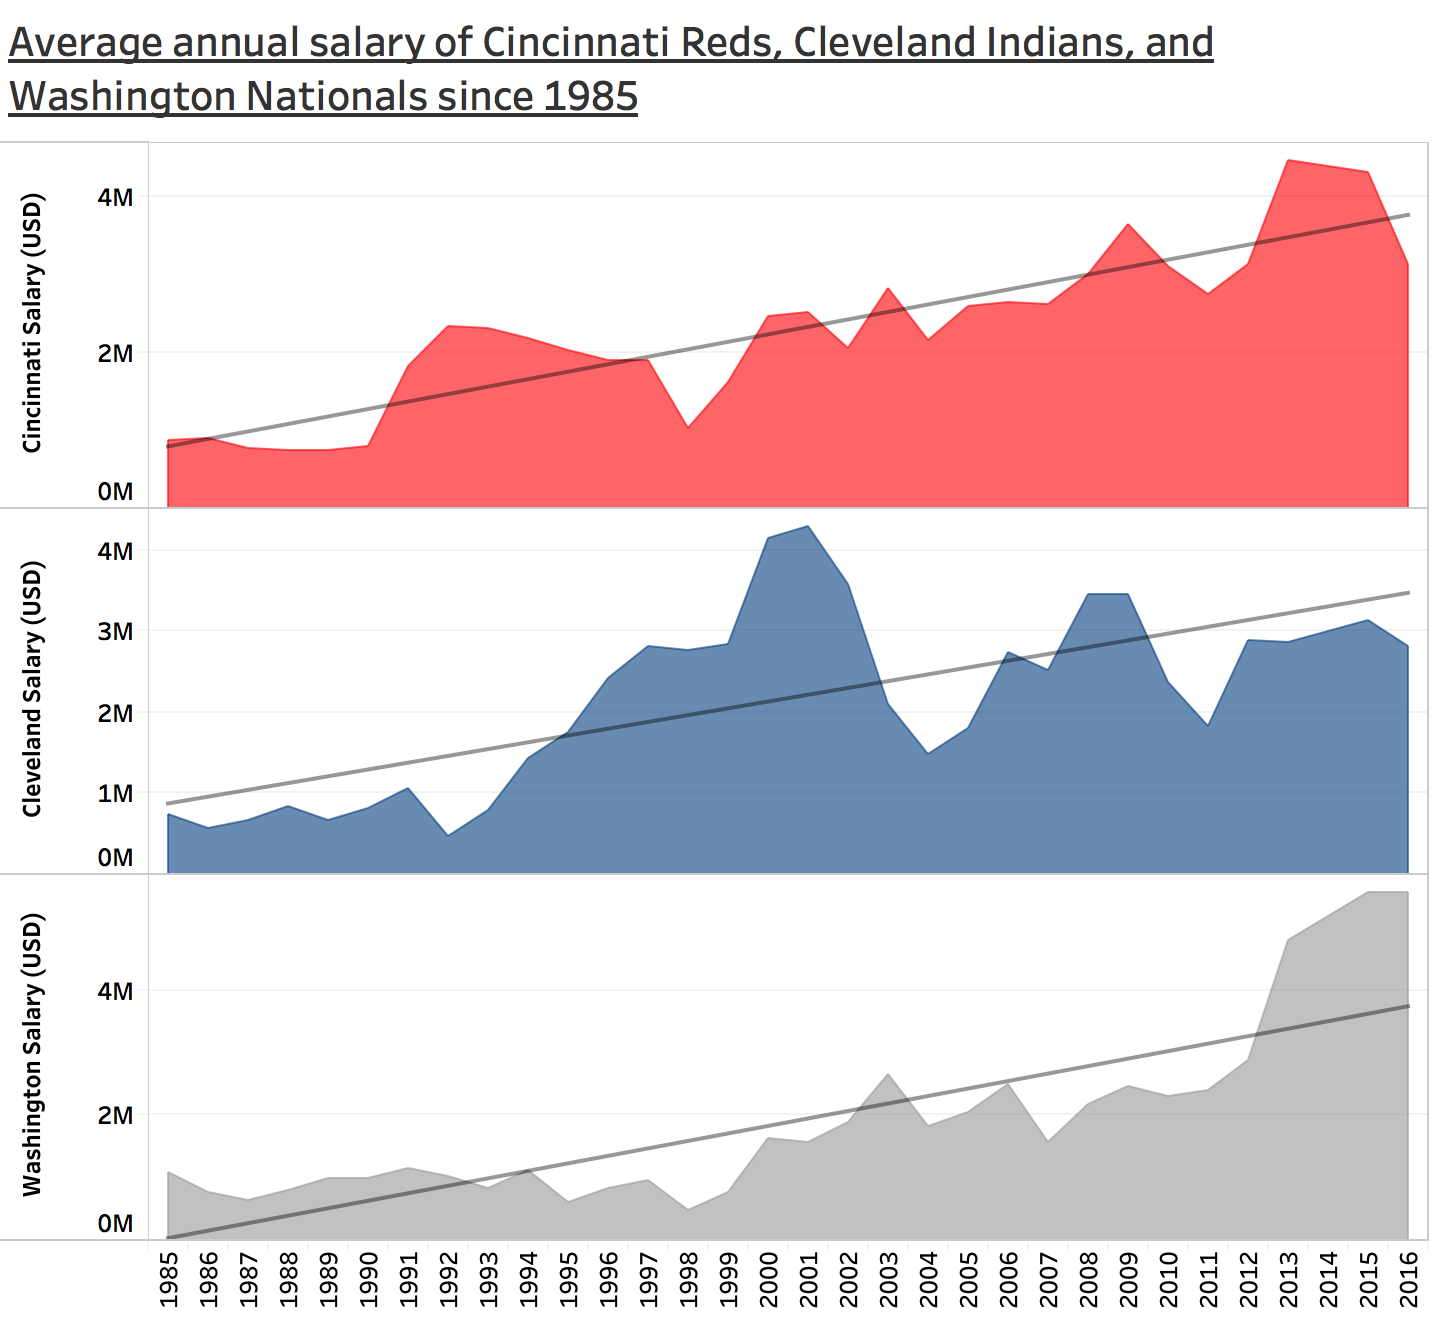

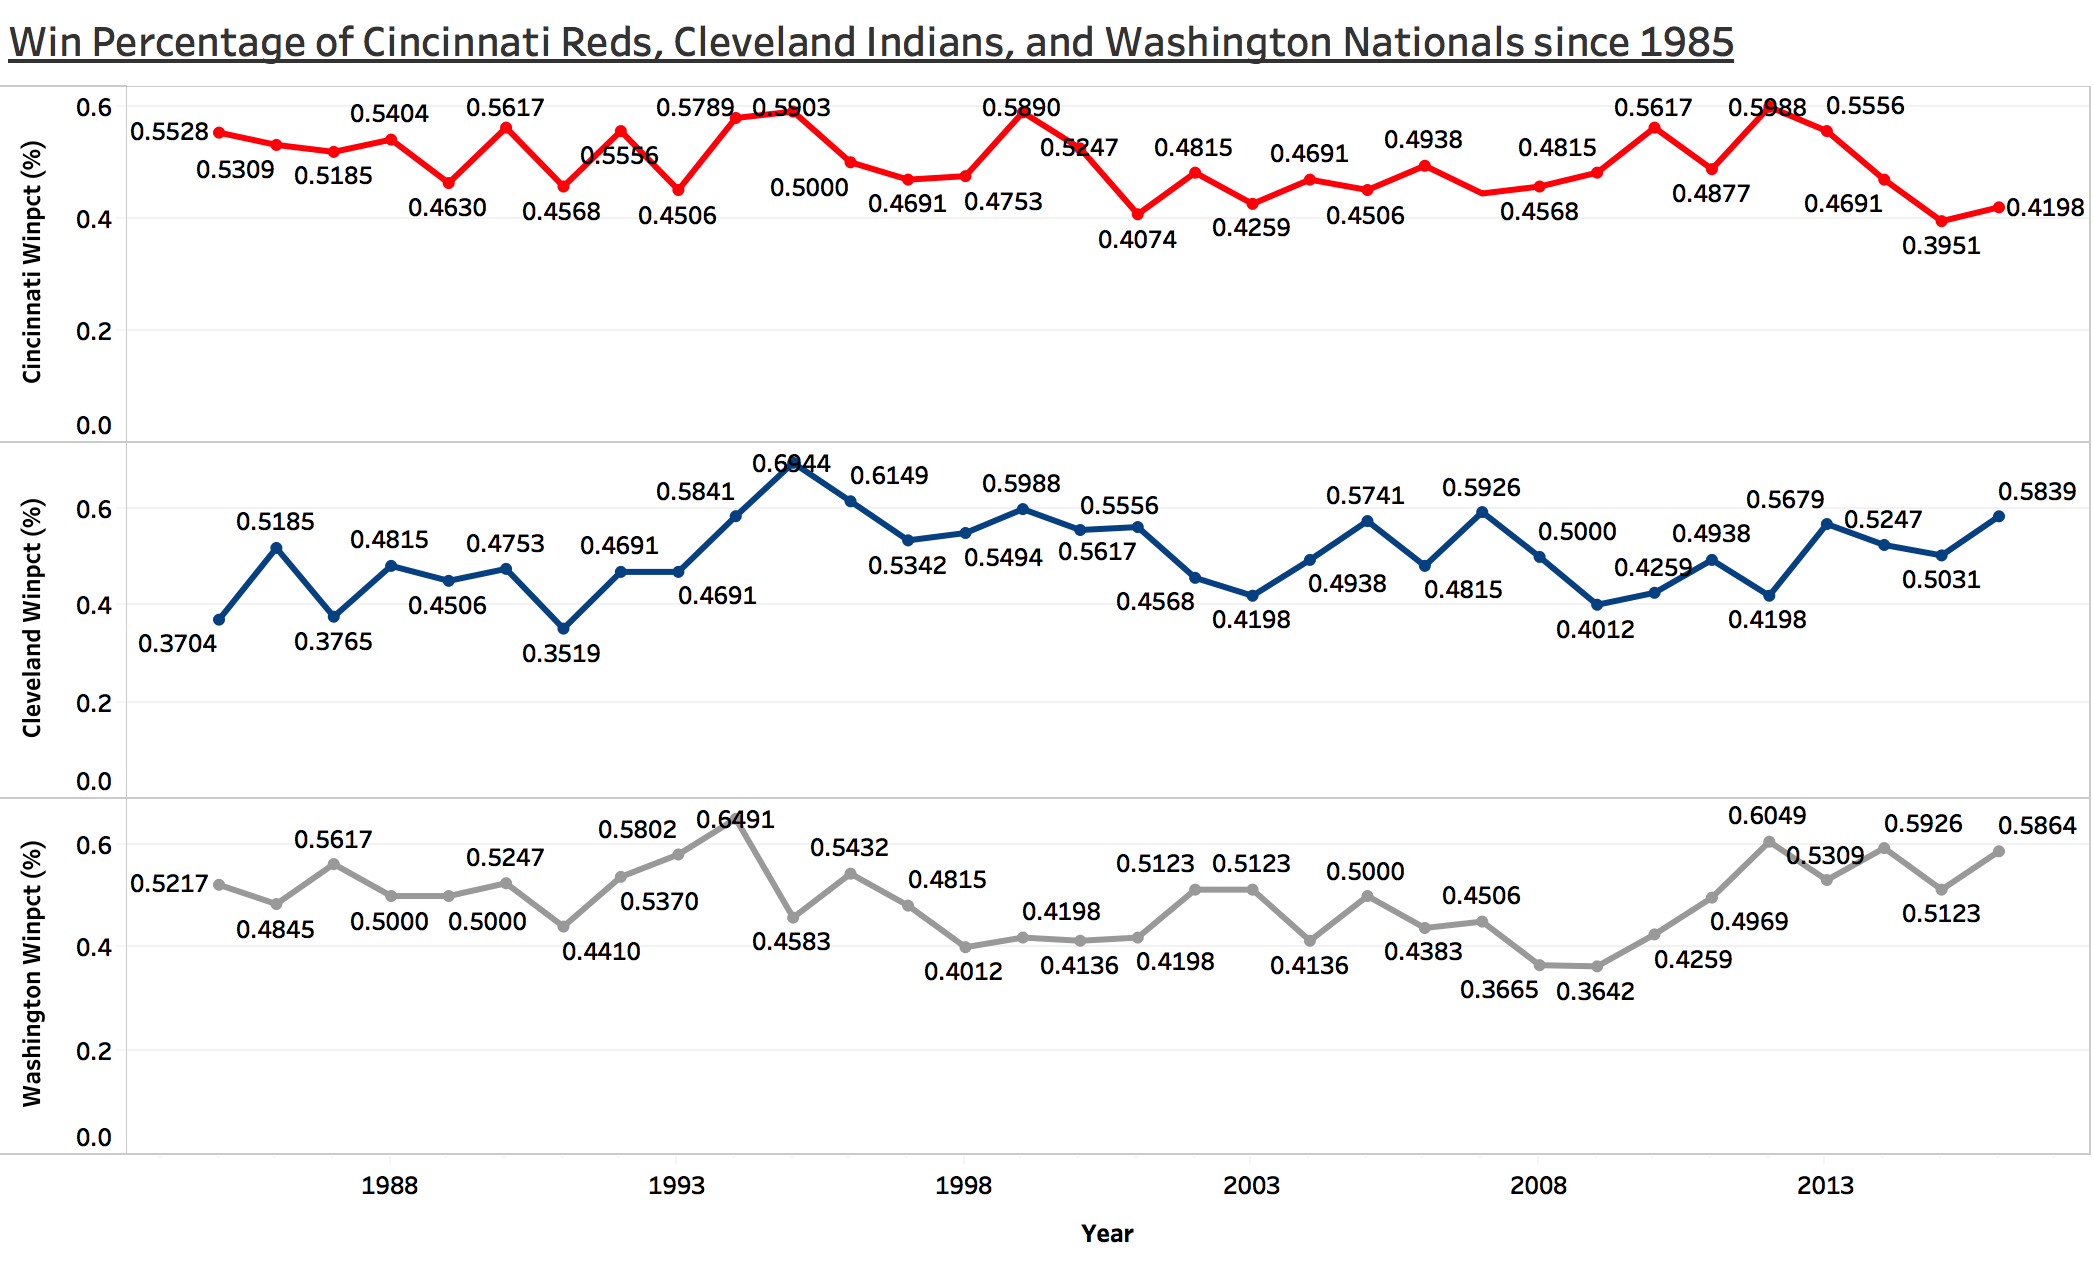

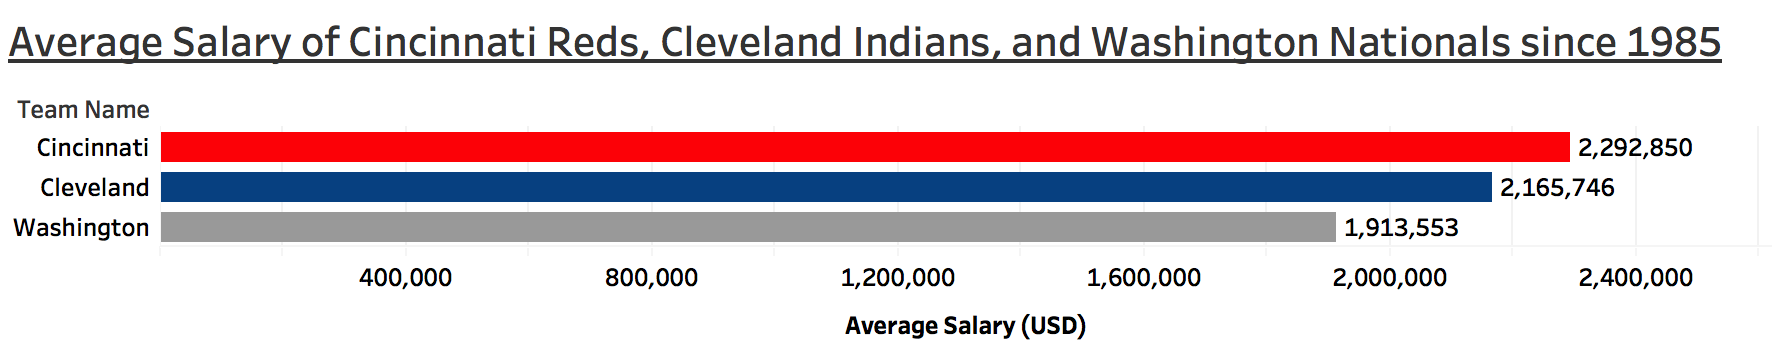

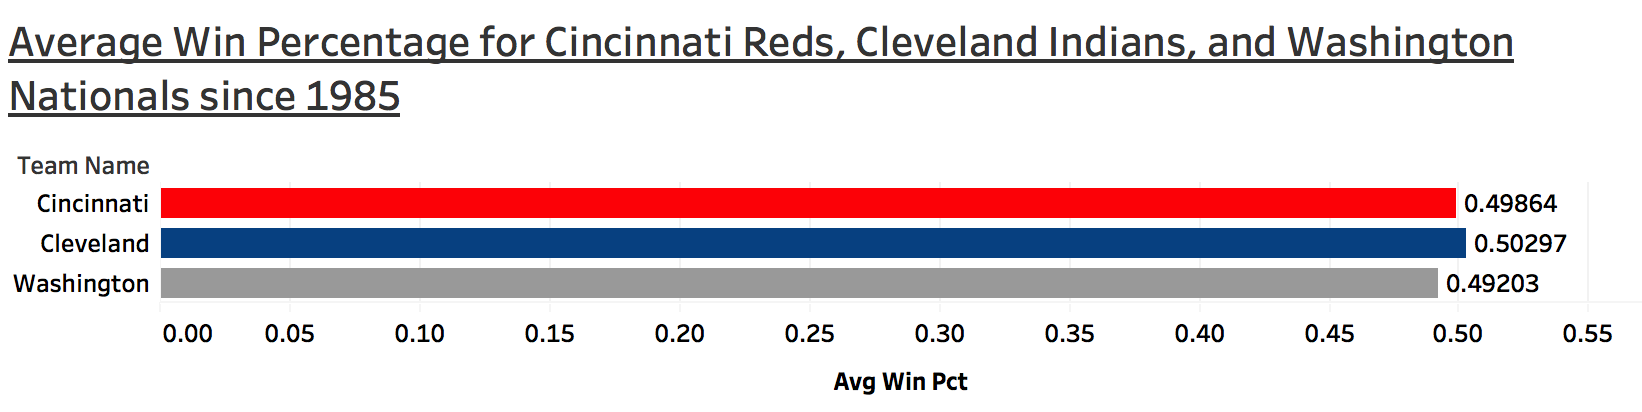

In order to assess the impact of player salaries on win percentage, we plotted win percentage against year, overlaid with information about average salary per team. Salaries were converted to 2017 dollars with the help of the inflation data from Oregon State University.

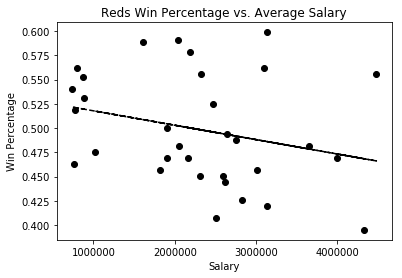

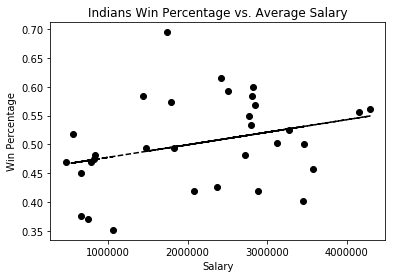

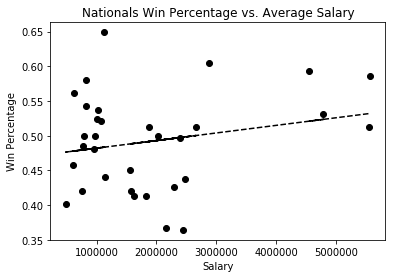

In [14]:
redCol = scaleColors(salary.RedsSalary)
cleCol = scaleColors(salary.CleSalary)
wsnCol = scaleColors(salary.WsnSalary)

import numpy as np

fit = np.polyfit(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Reds Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.RedsSalary, fit_fn(salary.RedsSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Indians Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.CleSalary, fit_fn(salary.CleSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Nationals Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=8)
plt.plot(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.WsnSalary, fit_fn(salary.WsnSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

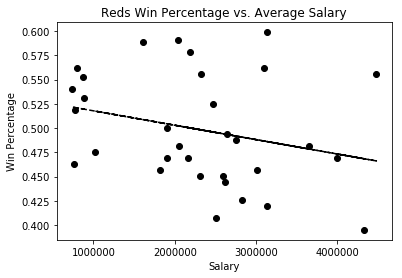

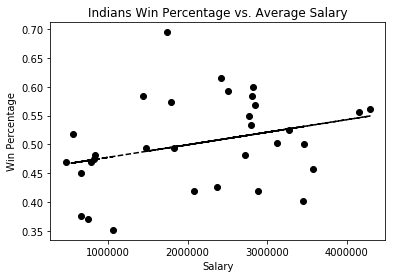

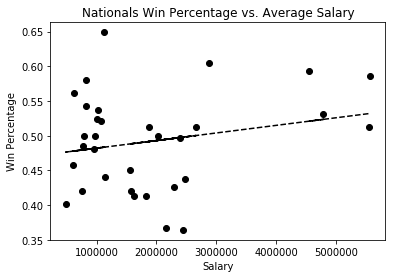

In [15]:
import numpy as np

fit = np.polyfit(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Reds Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.RedsSalary, pd.to_numeric(CleWasCinSTATS.CinWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.RedsSalary, fit_fn(salary.RedsSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Indians Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=5)
plt.plot(salary.CleSalary, pd.to_numeric(CleWasCinSTATS.CleWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.CleSalary, fit_fn(salary.CleSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

fit = np.polyfit(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 1)
fit_fn = np.poly1d(fit)
plt.title('Nationals Win Percentage vs. Average Salary')
plt.locator_params(axis='x', nbins=8)
plt.plot(salary.WsnSalary, pd.to_numeric(CleWasCinSTATS.WasWinpct[CleWasCinSTATS.yearID >= min(salary.yearID)]), 'yo', salary.WsnSalary, fit_fn(salary.WsnSalary), '--k', color = 'black')
plt.xlabel("Salary")
plt.ylabel("Win Percentage")
plt.show()

### Works Cited



“Baseball Rule Change Timeline.” Baseball Almanac, www.baseball-almanac.com/rulechng.shtml.

Albert, Jim. “Sabermetrics: The Past Present and Future.” Mathaware, 12 Feb. 2010, www.mathaware.org/mam/2010/essays/AlbertSabermetrics.pdf. 

Munday, Oliver. “Grantland.” Grantland, 24 July 2015, grantland.com/features/2015-mlb-avm-systems-ken-mauriello-jack-armbruster-moneyball-sabermetrics/. 

Woodruff, Jim. “How Much Money Do Baseball Players Make?” Chron.com, 29 June 2018, work.chron.com/much-money-baseball-players-make-14452.html.

Eye on Baseball staff. Nov 16. “What Is the Best Offensive Stat?” CBSSports.com, 6 Apr. 2017, www.cbssports.com/mlb/news/what-is-the-best-offensive-stat/.

Eye on Baseball staff. Nov 20. “What Is the Best Defensive Stat?” CBSSports.com, 6 Apr. 2017, www.cbssports.com/mlb/news/what-is-the-best-defensive-stat/.